In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('D:\Hutson\learning-materials\AI_ML\AIMLDLCV_advance\Class\Datasets\Time-series-datasets\co2.csv')
data.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2284 non-null   object 
 1   co2     2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


In [233]:
data['time'] = pd.to_datetime(data['time'])
data['co2'] =data['co2'].interpolate()
data

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


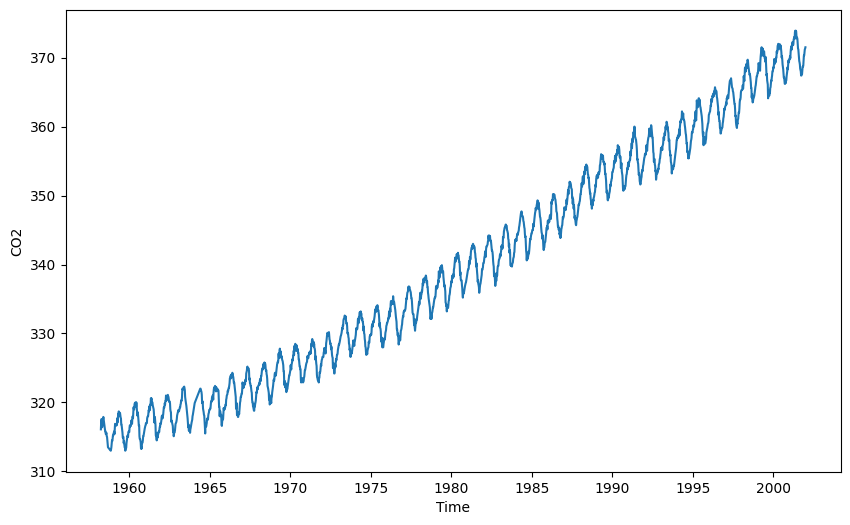

In [234]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['time'], data['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
plt.show()

In [235]:
# data['co2_1'] = data['co2'].shift(-1)
# data.head()

In [236]:
def create_direct_data(data, window_size, target_size):
    i = 1
    while i < window_size:
        data['co2_{}'.format(i)] = data['co2'].shift(-i)
        i+=1

    j = 0
    while j < target_size:
        data['target_{}'.format(j)] = data['co2'].shift(-j-window_size)
        j+=1
    data.dropna(axis=0, inplace=True)
    return data

In [237]:
window_size = 100
target_size = 3
create_direct_data(data, window_size, target_size).head(10)

C:\Users\tanhu\AppData\Local\Temp\ipykernel_18508\4198573959.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['co2_{}'.format(i)] = data['co2'].shift(-i)
C:\Users\tanhu\AppData\Local\Temp\ipykernel_18508\4198573959.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['target_{}'.format(j)] = data['co2'].shift(-j-window_size)
C:\Users\tanhu\AppData\Local\Temp\ipykernel_18508\4198573959.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

,time,co2,co2_1,co2_2,co2_3,co2_4,co2_5,co2_6,co2_7,co2_8,...,co2_93,co2_94,co2_95,co2_96,co2_97,co2_98,co2_99,target_0,target_1,target_2
0,1958-03-29,316.10,317.30,317.60,317.50,316.40,316.90,317.20,317.50,317.90,...,316.4,316.7,316.5,316.6,316.6,316.9,317.4,317.0,316.9,317.7
1,1958-04-05,317.30,317.60,317.50,316.40,316.90,317.20,317.50,317.90,317.55,...,316.7,316.5,316.6,316.6,316.9,317.4,317.0,316.9,317.7,318.0
2,1958-04-12,317.60,317.50,316.40,316.90,317.20,317.50,317.90,317.55,317.20,...,316.5,316.6,316.6,316.9,317.4,317.0,316.9,317.7,318.0,317.7
3,1958-04-19,317.50,316.40,316.90,317.20,317.50,317.90,317.55,317.20,316.85,...,316.6,316.6,316.9,317.4,317.0,316.9,317.7,318.0,317.7,318.6
4,1958-04-26,316.40,316.90,317.20,317.50,317.90,317.55,317.20,316.85,316.50,...,316.6,316.9,317.4,317.0,316.9,317.7,318.0,317.7,318.6,319.3
5,1958-05-03,316.90,317.20,317.50,317.90,317.55,317.20,316.85,316.50,316.15,...,316.9,317.4,317.0,316.9,317.7,318.0,317.7,318.6,319.3,319.0
6,1958-05-10,317.20,317.50,317.90,317.55,317.20,316.85,316.50,316.15,315.80,...,317.4,317.0,316.9,317.7,318.0,317.7,318.6,319.3,319.0,319.0
7,1958-05-17,317.50,317.90,317.55,317.20,316.85,316.50,316.15,315.80,315.80,...,317.0,316.9,317.7,318.0,317.7,318.6,319.3,319.0,319.0,319.7
8,1958-05-24,317.90,317.55,317.20,316.85,316.50,316.15,315.80,315.80,315.40,...,316.9,317.7,318.0,317.7,318.6,319.3,319.0,319.0,319.7,319.9
9,1958-05-31,317.55,317.20,316.85,316.50,316.15,315.80,315.80,315.40,315.50,...,317.7,318.0,317.7,318.6,319.3,319.0,319.0,319.7,319.9,319.8


In [238]:
targets = ["target_{}".format(i) for i in range(target_size)]
targets

['target_0', 'target_1', 'target_2']

In [239]:
test_size = 0.2

x_train = data.drop(['time']+targets,axis = 1)[:int(len(data)*(1-test_size))]
x_test = data.drop(['time']+targets,axis = 1)[int(len(data)*(1-test_size)):]
y_train = data[targets][:int(len(data)*(1-test_size))]
y_test = data[targets][int(len(data)*(1-test_size)):]

print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(1745, 100) (437, 100) (1745, 3) (437, 3)


In [240]:
models = [LinearRegression() for _ in range(target_size)]
for i, model in enumerate(models):
    model = model
    model.fit(x_train, y_train['target_{}'.format(i)])
    y_pred = model.predict(x_test)
    print('r2_score_model_{}: {}'.format(i,r2_score(y_test['target_{}'.format(i)],y_pred)))

# window_size = 5
# r2_score_model_0: 0.990694183549828
# r2_score_model_1: 0.9823771406805402
# r2_score_model_2: 0.9728273214391037

# window_size = 20
# r2_score_model_0: 0.9913068881245883
# r2_score_model_1: 0.9844619268691144
# r2_score_model_2: 0.9775360037847902

# window_size = 100
# r2_score_model_0: 0.9937970592000216
# r2_score_model_1: 0.9920028009595706
# r2_score_model_2: 0.9915021550368136

r2_score_model_0: 0.9937970592000216
r2_score_model_1: 0.9920028009595706
r2_score_model_2: 0.9915021550368136
